# Assignment 2

### Group 11  
Michael Hüppe, Leon Korkmaz

## Task 1: Template Matching

Correlation  filters  respond  most  strongly  to  regions  of  images  that  look  like  the  filter  itself.   This property is used for template matching.  In template matching, we cross correlate a template with an image.  The template is another image that is a prototype for what we want to localize in an image.The cross-correlation is the strongest where the image looks most like the template.In  this  task,  we  will  use  template  matching  to  match  an  image  of  a  barge  and  a  pusher  boat captured from a webcam stream to a wider panoramic view of the area.
The matching result could potentially later be used for other applications, for example for inland waterway monitoring.

In [8]:
#### imports
import matplotlib.pyplot as plt
from skimage import io, color, feature
import numpy as np

Download the template and panorama images, and convert them to grayscale.

In [9]:


# Load and preprocess the images
template_path = "template.jpg"  # Replace with your template image path
panorama_path = "panorama.jpg"  # Replace with your panorama image path

# Convert images to grayscale
template = color.rgb2gray(io.imread(template_path))
panorama = color.rgb2gray(io.imread(panorama_path))

Use the functionskimage.feature.matchtemplate to compute the normalized correlation be-tween two images.  Find the coordinates where the cross-correlation is the strongest

In [10]:
# Perform template matching
result = feature.match_template(panorama, template)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]  # Extract coordinates where match is strongest

Visualize the matching result by drawing a rectangle with the size of the template image over the panorama image.  You can for example usematplotlib.pyplot.Rectangle for this - see theAPI documentation for how to draw the rectangle.

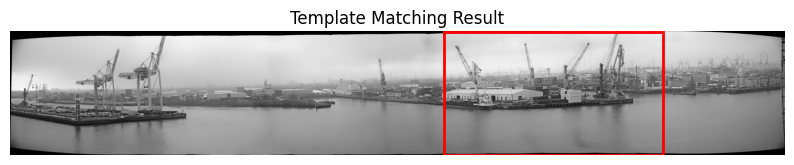

In [11]:
# Visualize the match
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.imshow(panorama, cmap="gray")
ax.add_patch(plt.Rectangle((x, y), template.shape[1], template.shape[0],
                            edgecolor="red", facecolor="none", linewidth=2))
ax.set_title("Template Matching Result")
ax.axis("off")
plt.show()

Flip the template horizontally.  Verify that the matching is no longer working by visualizing it.

In [12]:
# Flip the template horizontally
template_flipped = np.fliplr(template)

# Perform matching with flipped template
result_flipped = feature.match_template(panorama, template_flipped)
ij_flipped = np.unravel_index(np.argmax(result_flipped), result_flipped.shape)
x_flipped, y_flipped = ij_flipped[::-1]

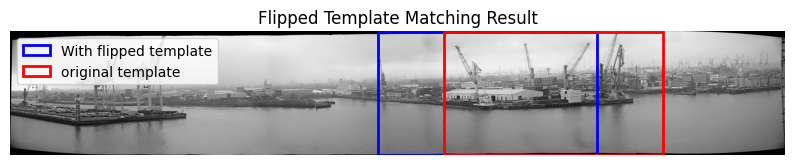

In [13]:
# Visualize the result for the flipped template
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.imshow(panorama, cmap="gray")
ax.add_patch(plt.Rectangle((x_flipped, y_flipped), template_flipped.shape[1],
                            template_flipped.shape[0], edgecolor="blue", facecolor="none", linewidth=2, label="With flipped template"))
ax.add_patch(plt.Rectangle((x, y), template.shape[1], template.shape[0],
                            edgecolor="red", facecolor="none", linewidth=2,  label="original template"))
ax.set_title("Flipped Template Matching Result")
ax.legend()
ax.axis("off")
plt.show()